In [81]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.models import load_model
from keras.datasets import mnist
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号


## 加载数据

In [82]:
"""
mnist数据集，为手写数字的图片数据集，训练数据60000张，测试数据10000张，每张图片是28*28像素的黑白图片
"""

(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
print(f'{X_train.shape=}')
print(f'{Y_train.shape=}')
print(f'{X_test.shape=}')
print(f'{Y_test.shape=}')

X_train.shape=(60000, 28, 28)
Y_train.shape=(60000,)
X_test.shape=(10000, 28, 28)
Y_test.shape=(10000,)


## 数据概览

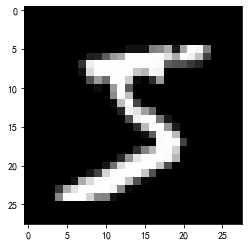

Y_train[0]=5


In [83]:
#显示训练集中的第 1 个图像
plt.imshow(X_train[0],cmap='gray')
plt.show()
# 打印标签值
print(f'{Y_train[0]=}')


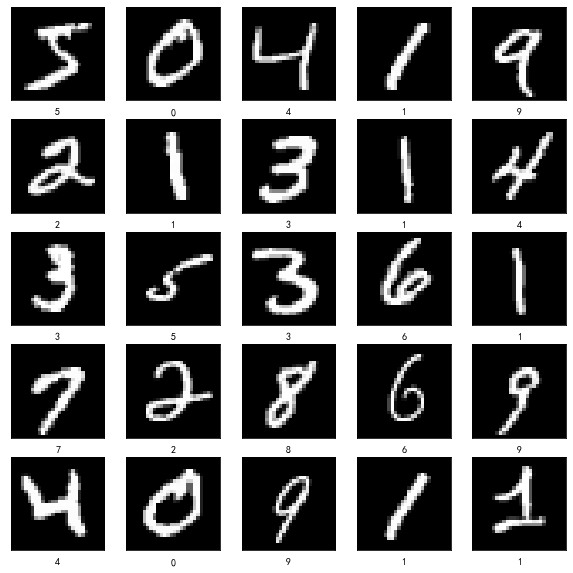

In [165]:
#显示训练集中的前 25 个图像，并在每个图像下方显示类名称。
fig = plt.figure(figsize=(10, 10))
fig.set_facecolor('white')

for i in range(25):
    plt.subplot(5, 5, i+1) # 注意i+1，从1开始计数
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(X_train[i],cmap='gray')
    # plt.imshow(X_train[i], cmap=plt.cm.binary)
    # plt.imshow(X_train[i], cmap=plt.cm.ocean)
    plt.xlabel(Y_train[i])
plt.savefig('./output/10/mnist手写数据.png',dpi=300)
plt.show()


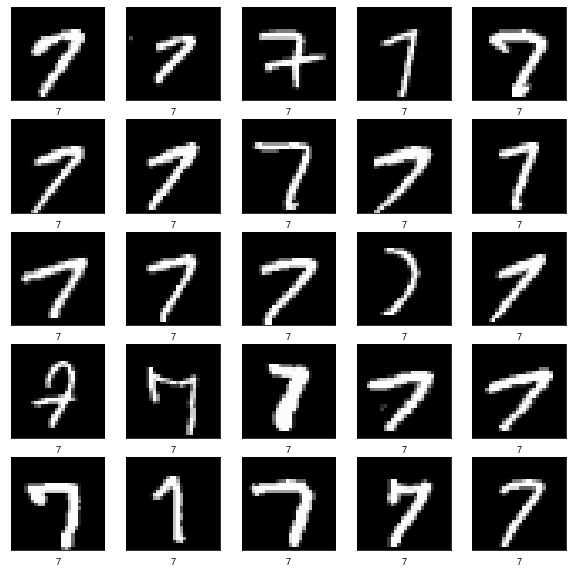

In [117]:
#显示训练集中的数字7的不同图像
fig = plt.figure(figsize=(10, 10))
fig.set_facecolor('white')
num=7
for i in range(25):
    plt.subplot(5, 5, i+1)  # 注意i+1，从1开始计数
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(X_train[Y_train==num][i], cmap='gray')
    plt.xlabel(num)
plt.show()


## 加载模型

在[10_mnist_recognizer.py](./10_mnist_recognizer.py)进行训练，模型保存到./model/10_model.h5

In [85]:
from tensorflow.keras.utils import to_categorical

# 进行数据预处理
## 图像灰度抽平到一阶张量，图像数据抽平到一阶张量
X_train_flatten = X_train.reshape(X_train.shape[0], -1)/255
X_test_flatten = X_test.reshape(X_test.shape[0], -1)/255
# 对Y标签进行独热编码
Y_train_coded = to_categorical(Y_train, 10)
Y_test_coded = to_categorical(Y_test, 10)


In [86]:
# 加载训练好的模型
model = load_model('./model/10_model.h5')

## 进行预测

In [122]:
# 训练完毕，进行预测

Y_test_pre = model.predict(X_test_flatten)
loss, accuracy = model.evaluate(X_test_flatten, Y_test_coded)
print(f"{loss=}")
print(f"{accuracy=}")


313/313 [==============================] - 1s 2ms/step - loss: 0.1352 - accuracy: 0.9782
loss=0.13523221015930176
accuracy=0.9782000184059143


In [129]:
# 图片绘制函数
def plot_image(i, X, Y, predictions):
    prediction, label, img = predictions[i], Y[i], X[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction)
    if predicted_label == label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("预测为{}, 概率为{:2.0f}% (实际是{})".format(predicted_label,
                                               100*np.max(prediction),
                                               label), color=color)

# 概率绘制
def plot_prob(i,  Y, predictions):
    prediction, label = predictions[i], Y[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction, color="#777777")
    plt.ylim([0, 1])
    label_pre = np.argmax(prediction)
    thisplot[label_pre].set_color('red')
    thisplot[label].set_color('blue')


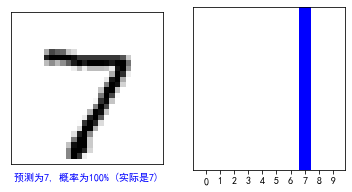

In [130]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, X_test,Y_test,Y_test_pre)
plt.subplot(1,2,2)
plot_prob(i,Y_test,Y_test_pre)
plt.show()

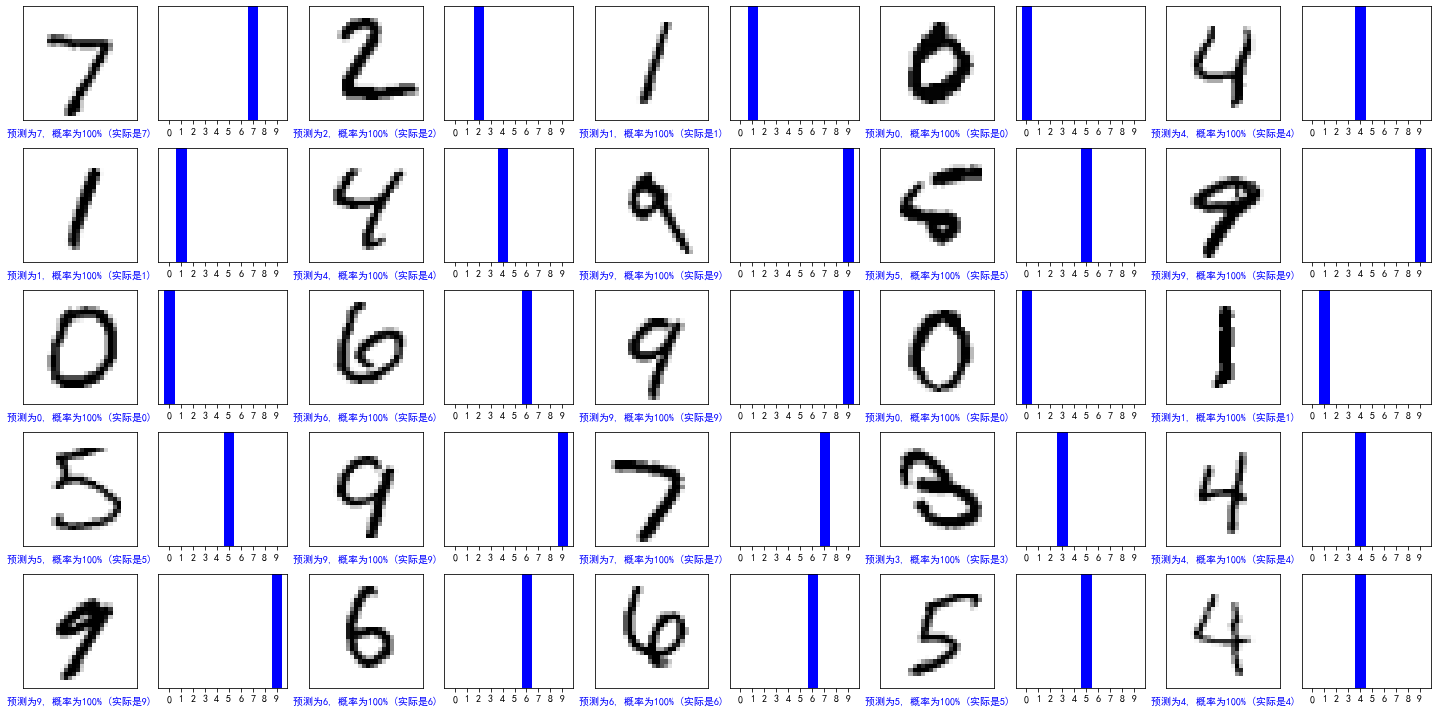

In [164]:
# 预测结果可视化
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
fig = plt.figure(figsize=(2*2*num_cols, 2*num_rows))
fig.set_facecolor('white')
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, X_test,Y_test,Y_test_pre)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_prob(i, Y_test,Y_test_pre)
plt.tight_layout()
plt.savefig('./output/10/识别.png',dpi=300)
plt.show()


In [136]:
# 分析结果函数
def evaluate_single(i,X,Y, predictions):
    prediction, label, img = predictions[i], Y[i], X[i]
    predicted_label = np.argmax(prediction)
    prob=100*np.max(prediction)
    message = f"序号{i}\t 预测为{predicted_label}\t概率{prob:2.0f}%\t实际是 ({label})"
    # print(message)
    if predicted_label == label:
        return 1
    else:
        return 0


right_list=[]
error_list=[]
num_images=Y_test.shape[0]
for i in range(num_images):
    if evaluate_single(i,X_test, Y_test,Y_test_pre):
        right_list.append(i)
    else:
        error_list.append(i)

In [139]:
print(error_list)
print(f"Error Num={len(error_list)}")


[115, 149, 247, 321, 340, 445, 447, 449, 582, 583, 646, 659, 684, 691, 720, 813, 846, 938, 947, 951, 965, 1003, 1014, 1032, 1039, 1082, 1112, 1182, 1224, 1226, 1232, 1242, 1247, 1251, 1299, 1319, 1328, 1378, 1393, 1395, 1414, 1444, 1494, 1522, 1530, 1549, 1609, 1621, 1681, 1717, 1754, 1790, 1828, 1899, 1901, 1941, 1982, 1984, 1987, 2016, 2024, 2035, 2070, 2098, 2109, 2118, 2135, 2182, 2224, 2272, 2293, 2387, 2406, 2408, 2414, 2422, 2437, 2488, 2526, 2573, 2582, 2597, 2607, 2648, 2654, 2743, 2877, 2921, 2927, 2939, 3073, 3117, 3225, 3342, 3422, 3503, 3520, 3558, 3597, 3674, 3767, 3776, 3780, 3796, 3808, 3818, 3838, 3853, 3859, 3893, 3906, 3941, 3943, 3976, 4007, 4065, 4078, 4102, 4163, 4199, 4201, 4248, 4271, 4289, 4425, 4443, 4497, 4500, 4504, 4534, 4536, 4548, 4551, 4601, 4724, 4740, 4807, 4823, 4860, 4880, 4943, 4956, 5140, 5331, 5457, 5642, 5676, 5734, 5749, 5936, 5937, 5955, 5972, 5973, 5982, 6011, 6023, 6030, 6045, 6046, 6059, 6173, 6390, 6532, 6555, 6560, 6571, 6572, 6574, 6576, 

In [141]:
# 计算accuracy
accuracy=(Y_test.shape[0]-len(error_list))/Y_test.shape[0]
print(f"{accuracy=:.2%}")

accuracy=97.82%


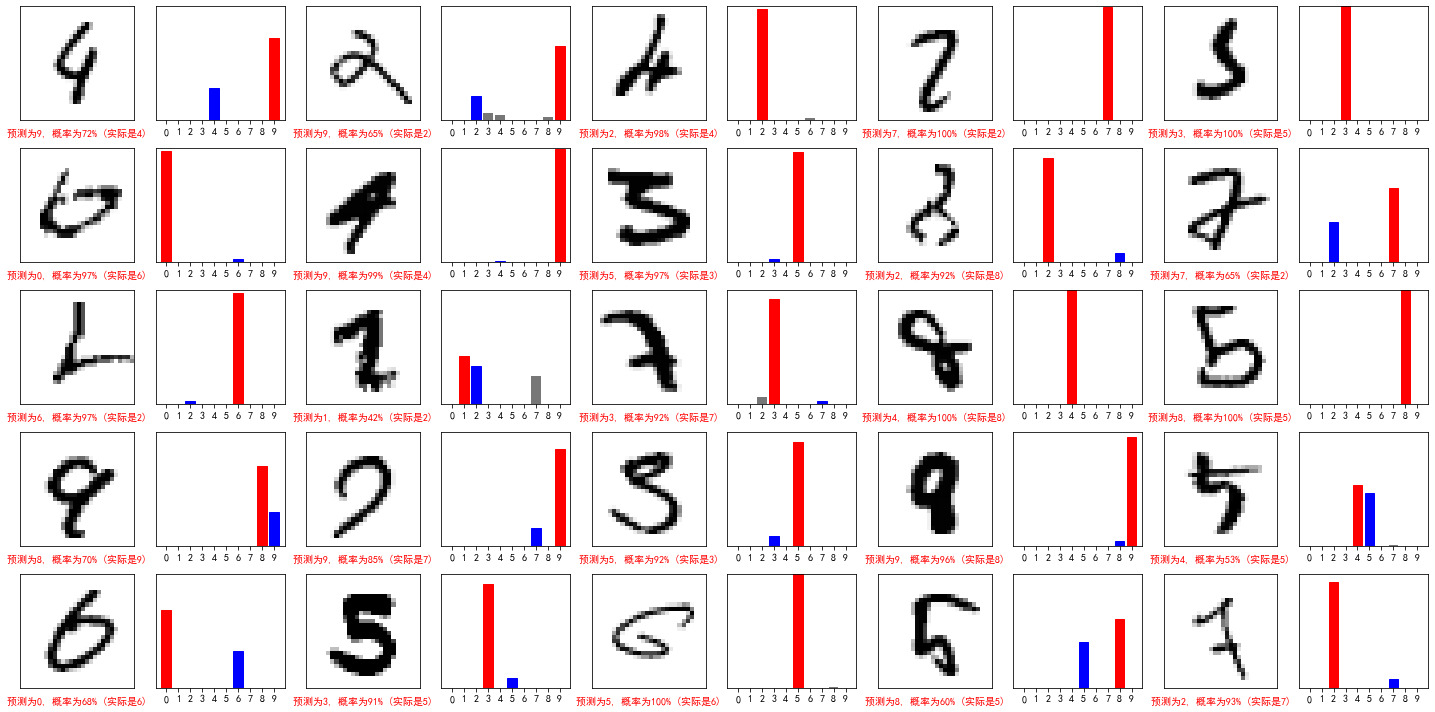

In [163]:
# 预测结果可视化
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols

fig = plt.figure(figsize=(2*2*num_cols, 2*num_rows))
fig.set_facecolor('white')

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(error_list[i], X_test,Y_test,Y_test_pre)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_prob(error_list[i], Y_test,Y_test_pre)
plt.tight_layout()
plt.savefig('./output/10/错误识别.png',dpi=300)
plt.show()

[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]
[969, 1125, 1006, 985, 966, 864, 940, 999, 946, 982]
[0.98877551 0.99118943 0.9748062  0.97524752 0.98370672 0.96860987
 0.98121086 0.97178988 0.97125257 0.97324083]


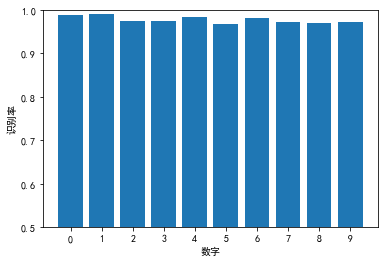

In [160]:
# 统计数据集各数字的个数和预测正确的个数

## 统计测试数据集各数字的个数
num_list=[0,0,0,0,0,0,0,0,0,0]
for i in range(Y_test.shape[0]):
    num_list[Y_test[i]]+=1
print(num_list)

## 统计测试数据集各数字预测正确的个数
num_correct=[0,0,0,0,0,0,0,0,0,0]
for i in range(Y_test.shape[0]):
    if evaluate_single(i,X_test, Y_test,Y_test_pre):
        num_correct[Y_test[i]]+=1
print(num_correct)


num_list=np.array(num_list)
num_correct=np.array(num_correct)
correct_rate=num_correct/num_list
print(correct_rate)
#绘制折线图
plt.bar(range(10),correct_rate)
plt.ylim([0.5,1])
plt.xticks(range(10),['0','1','2','3','4','5','6','7','8','9'])
plt.xlabel("数字")
plt.ylabel("识别率")
plt.show()

In [157]:
print(f"识别率最高的数字是：{np.argmax(correct_rate)},识别率为：{np.max(correct_rate)}")
print(f"识别率最低的数字是：{np.argmin(correct_rate)},识别率为：{np.min(correct_rate)}")

识别率最高的数字是：1,识别率为：0.9911894273127754
识别率最低的数字是：5,识别率为：0.968609865470852
